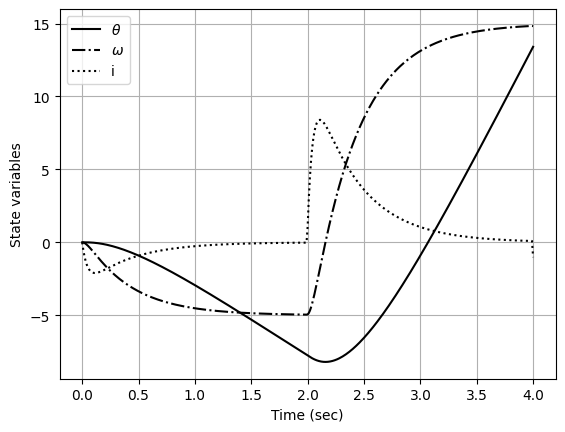

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import StateSpace, lsim, square

# Define system matrices
A = np.array([[0, 1, 0],
              [0, 0, 4.438],
              [0, -12, -24]])

b1 = np.array([0, 0, 20]).reshape(-1, 1)
b2 = np.array([0, -7.396, 0]).reshape(-1, 1)
B = np.hstack((b1, b2))

C = np.array([[1, 0, 0],
              [0, 1, 0]])
D = np.array([[0], [0]])

# Only first input is used
DC_motor = StateSpace(A, b1, C, D)

# Time vector
t = np.arange(0, 4.01, 0.01)
N = t.size

# Generate input u using a simple way
u_simple = np.zeros(N)
for i in range(N):
    if t[i] < 2:
        u_simple[i] = 3
    else:
        u_simple[i] = -3

# Generate input u using a professional way
u_prof = -6 * square(2 * np.pi * t / 4) + 3

# Simulate the system with professional input
_, y, x = lsim(DC_motor, U=u_prof, T=t)

# Plot the result
plt.plot(t, x[:, 0], 'k', label=r'$\theta$')
plt.plot(t, x[:, 1], 'k-.', label=r'$\omega$')
plt.plot(t, x[:, 2], 'k:', label='i')
plt.grid(True)
plt.xlabel('Time (sec)')
plt.ylabel('State variables')
plt.legend()
plt.show()
